In [15]:
#imports
import numpy as np
import math

from filterpy.common import Q_discrete_white_noise
from numpy import dot, sum, tile
from scipy.linalg import inv, det
from numpy.random import randn
import matplotlib.pyplot as plt


def compute_data(z_var, process_var, count=1, dt=1.):
    "returns track, measurements 1D ndarrays"
    x, vel = 0., 1.
    z_std = math.sqrt(z_var)
    p_std = math.sqrt(process_var)
    xs, zs = [], []
    for _ in range(count):
        v = vel + (randn() * p_std)
        x += v*dt
        xs.append(x)
        zs.append(x + randn() * z_std)
    return np.array(xs), np.array(zs)

track, zedd = compute_data(2.45, 2.45, 50)

'''
def preprocess(measured_var, covar, process_model, white_noise_var, dt, sensor_covar, senor_measurement_function, B=0, U=0):
   

    :param measured_var: (n x 1 ) state variable vector - these can be the n observed vars or hidden vars (inferred from obs var)
           For example: (10,5)
    :param covar: (n x n) - diagonals are variance of each n var, off-diagonal = covar
           For example: (500,49) where 500 is the variance of state var 1 etc
    :param process_model: equations which describe the behaviour of the system in matrix from k to k+1
           For example: position' = 1 (position) + 1 (velocity* delta time)
                        velocity' = 0 (position) + 1 (velocity)
           Process_model [1  delta t
                          0    1    ]
    :param white_noise_var: (float)
    :param dt: time step (seconds)
    :param B: Input control matrix
    :param U: Control input
    :param num_sensors: number of sensors used for measurements (int)
    :param sensor_covar: variance of sensors
           For example: (5,3)
    :param senor_measurement_function: (senor1 weight, senor2 weight, senor3 we...)
           For example: (1,0,0)
    :return: All variables needed for Kalman Filter predict + update
    
    
    X = np.array(measured_var)
    P = np.diag(covar)
    A = np.array(process_model)
    Q = Q_discrete_white_noise(dim=2, dt=dt, var=white_noise_var) #dim = shape of X?
    B = B
    U = U
    #Z = num_sensors
    R = np.array([[sensor_covar]])
    H = np.array([senor_measurement_function])
    return (X, P, A, Q, B, U, R, H)


def kal_predict(X,P,A,Q,B,U):


    :param X: (n x 1 ) state variable vector
    :param P: (n x n) state covariance
    :param A: transition matrix
    :param Q: process noise covariance matrix
    :param B: input effect matrix
    :param U: control input
    :return: (X,P)

    This function predicts the mean X and covar P of the system state at the time step k


    X = dot(A,X) + dot(B,U)
    P = dot(A, dot(P, A.T)) + Q
    return (X,P)

def kal_update(zedd, X, P, H, R):


    :param X: state variable vector
    :param P: state covariance
    :param Z: number of sensors.
              For example: if only the position is measured then Z = 1
    :param H: measurement function
    :param R: (m x m) measurement noise matrix for m sensors
    :return: (xs, cv)

    S = R + dot(H, dot(P, H.T))
    #K = dot(P, dot(H.T, inv(S)))


    K = dot(P, H.T).dot(inv(S))
    Y = zedd - dot(H,X) #measurement function
    X += dot(K, Y)
    P = P - dot(K, dot(S, K.T))

    prod_HX = dot(H, X)


    #lk = gauss_pdf(zedd, prod_HX, S)

    return (X, P, K, prod_HX, S)
    #return X,P

def gauss_pdf(A, M, S):
    if M.shape()[1] == 1:
        DX = A - np.tile(M, A.shape()[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape()[0] * math.log(2*math.pi) + 0.5 * math.log(det(S))
        P = math.exp(-E)
    elif A.shape()[1] == 1:
        DX = np.tile(A, M.shape()[1]) - M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis = 0)
        E = E + 0.5 * M.shape()[0] * math.log(2*math.pi) + 0.5 * math.log(det(S))
        P = math.exp(-E)

    else:
        DX = A-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape()[0] * math.log(2*math.pi) + 0.5 * math.log(det(S))
        P = math.exp(-E)

    return (P[0], E[0])


def run_kf(zedd, measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function, B=0, U=0):
    xs, cv = [], []
    (X, P, A, Q, B, U, R, H) = preprocess(measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function, B=0, U=0)
    for i in zedd:
        (X,P) = kal_predict(X, P, A, Q, B, U)
        (X, P, K, prod_HX, S) = kal_update(i, X, P, H, R)
        xs.append(X)
        cv.append(P)
    xs, cv = np.array(xs), np.array(cv)
    return xs,cv


xs, cv = run_kf(zedd = zedd, measured_var=(10,4.5), covar=(500,49), process_model=((1, 0.1), (0, 1)), white_noise_var=.35, dt=.1, sensor_covar=5, measurement_function=(1,0))

print("COV")
print(cv)
#print(xs[:, 0])

print("X 2")
print(xs[:, 1])
print("COV")
print(cv)


print(zedd)
plt.plot(range(1, len(zedd)+1), xs[:, 0], c ='r')
plt.plot(range(1, len(zedd)+1), zedd, c = 'green')
plt.show()
'''

'\ndef preprocess(measured_var, covar, process_model, white_noise_var, dt, sensor_covar, senor_measurement_function, B=0, U=0):\n   \n\n    :param measured_var: (n x 1 ) state variable vector - these can be the n observed vars or hidden vars (inferred from obs var)\n           For example: (10,5)\n    :param covar: (n x n) - diagonals are variance of each n var, off-diagonal = covar\n           For example: (500,49) where 500 is the variance of state var 1 etc\n    :param process_model: equations which describe the behaviour of the system in matrix from k to k+1\n           For example: position\' = 1 (position) + 1 (velocity* delta time)\n                        velocity\' = 0 (position) + 1 (velocity)\n           Process_model [1  delta t\n                          0    1    ]\n    :param white_noise_var: (float)\n    :param dt: time step (seconds)\n    :param B: Input control matrix\n    :param U: Control input\n    :param num_sensors: number of sensors used for measurements (int)\n

In [17]:
def compute_data(z_var, process_var, count=1, dt=1.):
    "returns track, measurements 1D ndarrays"
    x, vel = 0., 1.
    z_std = math.sqrt(z_var)
    p_std = math.sqrt(process_var)
    xs, zs = [], []
    for _ in range(count):
        v = vel + (randn() * p_std)
        x += v*dt
        xs.append(x)
        zs.append(x + randn() * z_std)
    return np.array(xs), np.array(zs)

track, zedd = compute_data(2.45, 4.45, 50)

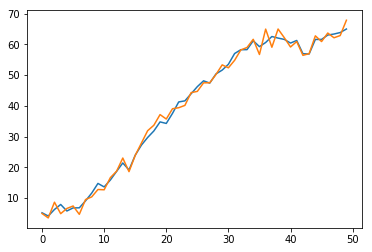

In [18]:
plt.plot(track)
plt.plot(zedd)

In [79]:
def preprocess(num_measured, measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function, B=0, U=0):

    dim_z = num_measured
    X = np.array(measured_var)
    P = np.diag(covar)
    A = np.array(process_model)
    Q = Q_discrete_white_noise(dim=X.shape[0], dt=dt, var=white_noise_var) #dim = shape of X?
    B = B
    U = U
    R = np.array([[sensor_covar]])
    H = np.array([measurement_function])
    return (dim_z, X, P, A, Q, dt, R, H, B, U)

In [81]:
dim_z, X, P, A, Q, dt, R, H, B, U = preprocess(num_measured=1, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 1), (0, 1)), white_noise_var=.35, dt=1, 
                sensor_covar=5, measurement_function=(1,0))

2

In [ ]:
zedd = zedd, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 0.1), (0, 1)), white_noise_var=.35, dt=.1, 
                sensor_covar=5, measurement_function=(1,0)

In [12]:
def kal_predict(X,P,A,Q,B,U):
    '''

    :param X: (n x 1 ) state variable vector
    :param P: (n x n) state covariance
    :param A: transition matrix
    :param Q: process noise covariance matrix
    :param B: input effect matrix
    :param U: control input
    :return: (X,P)

    This function predicts the mean X and covar P of the system state at the time step k
    '''

    X = dot(A,X) + dot(B,U)
    P = dot(A, dot(P, A.T)) + Q
    return (X,P)

In [13]:
def kal_update(zedd, X, P, H, R):
    '''

    :param X: state variable vector
    :param P: state covariance
    :param Z: number of sensors.
              For example: if only the position is measured then Z = 1
    :param H: measurement function
    :param R: (m x m) measurement noise matrix for m sensors
    :return: (xs, cv)
    '''
    S = R + dot(H, dot(P, H.T))
    #K = dot(P, dot(H.T, inv(S)))


    K = dot(P, H.T).dot(inv(S))
    Y = zedd - dot(H,X) #measurement function
    X += dot(K, Y)
    P = P - dot(K, dot(S, K.T))

    prod_HX = dot(H, X)


    #lk = gauss_pdf(zedd, prod_HX, S)

    return (X, P, K, prod_HX, S)
    #return X,P

In [32]:
def run_kf(zedd, measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function):
    xs, cv = [], []
    (X, P, A, Q, B, U, R, H) = preprocess(measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function)
    for i in zedd:
        (X,P) = kal_predict(X, P, A, Q, B, U)
        (X, P, K, prod_HX, S) = kal_update(i, X, P, H, R)
        xs.append(X)
        cv.append(P)
    xs, cv = np.array(xs), np.array(cv)
    return xs,cv



In [33]:
xs, cv = run_kf(zedd = zedd, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 1), (0, 1)), white_noise_var=.35, dt=1, 
                sensor_covar=5, measurement_function=(1,0))

In [36]:
xs[:,0]

array([ 5.03001419,  3.97812133,  7.61961646,  6.30899767,  6.6631695 ,
        7.26504401,  6.10841409,  7.82742264,  9.40671411, 11.58029445,
       12.80396738, 15.41135809, 17.96996796, 21.55718918, 21.28435386,
       23.37248124, 26.54416711, 30.39383232, 33.45175051, 36.76075658,
       37.69192966, 39.49748823, 40.46184093, 41.11834756, 43.39320499,
       44.86823683, 46.98185768, 48.11021054, 49.9240985 , 52.46711698,
       53.36362042, 54.86454802, 57.32198281, 59.08106694, 61.28622159,
       59.87385806, 62.85457153, 61.64902509, 63.63596947, 63.39447114,
       61.49008951, 61.04568154, 58.49159826, 57.15038755, 59.44884481,
       60.21986978, 62.14457916, 62.56690477, 63.06142644, 65.82828564])

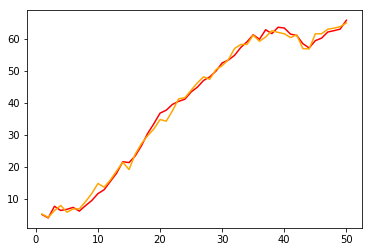

In [49]:
plt.plot(range(1, len(zedd)+1), xs[:, 0], c ='r')
#plt.plot(range(1, len(zedd)+1), zedd, 'o')
plt.plot(range(1, len(zedd)+1), track, c='orange')

In [ ]:

print("COV")
print(cv)
#print(xs[:, 0])
'''
print("X 2")
print(xs[:, 1])
print("COV")
print(cv)
'''

print(zedd)
plt.plot(range(1, len(zedd)+1), xs[:, 0], c ='r')
plt.plot(range(1, len(zedd)+1), zedd, c = 'green')
plt.show()

# Clean code

In [102]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [82]:
dim_z, X, P, A, Q, dt, R, H, B, U = preprocess(num_measured=1, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 1), (0, 1)), white_noise_var=.35, dt=1, 
                sensor_covar=5, measurement_function=(1,0))

In [44]:
#Given data

track, zedd

(array([ 5.17826975,  4.13359822,  6.26291903,  7.88551205,  5.7719496 ,
         6.77402889,  6.80220287,  9.06228235, 11.59984666, 14.7380589 ,
        13.59893827, 15.85816218, 18.65263663, 21.39186019, 19.12096889,
        23.91196937, 27.20478119, 29.68862518, 31.80898836, 34.75555701,
        34.25885855, 37.51897735, 41.24633427, 41.60072837, 43.91390944,
        46.22723218, 48.12071592, 47.38332407, 50.36312145, 51.60984639,
        53.49917907, 56.99983314, 58.24391637, 58.26829312, 61.1554886 ,
        59.24732148, 60.59535227, 62.53842562, 62.02624316, 61.60353936,
        60.40770142, 61.25001177, 56.94046222, 56.8578121 , 61.58311953,
        61.59231417, 63.0180285 , 63.34610788, 63.82961109, 64.97660576]),
 array([ 4.94378034,  3.51620188,  8.62326185,  4.89791621,  6.58581016,
         7.39735472,  4.6763106 ,  9.48334512, 10.36868813, 12.76178636,
        12.66960148, 16.62709532, 18.7046467 , 22.99745861, 18.57432217,
        23.85566287, 27.87513833, 31.88719468, 33

In [89]:
X

array([10. ,  4.5])

In [90]:
def create_kf_and_assign_predict_update(dim_z, X, P, A, Q, dt, R, H, B, U):
    kf = KalmanFilter(dim_x=X.shape[0], dim_z=dim_z)
    kf.x = X
    kf.P = P
    kf.F = A
    kf.Q = Q
    kf.B = B
    kf.U = U
    kf.R = R
    kf.H = H
    return kf

In [91]:
kf = create_kf_and_assign_predict_update(dim_z, X, P, A, Q, dt, R, H, B, U)

In [103]:
kf

KalmanFilter object
dim_x = 2
dim_z = 1
dim_u = 0
x = [19.   4.5]
P = [[696.875  98.7  ]
     [ 98.7    49.7  ]]
x_prior = [19.   4.5]
P_prior = [[696.875  98.7  ]
           [ 98.7    49.7  ]]
x_post = [[0. 0.]].T
P_post = [[1. 0.]
          [0. 1.]]
F = [[1 1]
     [0 1]]
Q = [[0.0875 0.175 ]
     [0.175  0.35  ]]
R = [[5]]
H = [[1 0]]
K = [[0. 0.]].T
y = [[0.]]
S = [[0.]]
SI = [[0.]]
M = [[0.]]
B = 0
z = [[None]]
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = <function inv at 0x10f7ae2f0>

In [106]:
from numpy import random
zs = [t + random.randn()*4 for t in range (40)]
Fs = [np.array([[1., dt], [0, 1]]) for dt in dts]

(mu, cov, _, _) = kf.batch_filter(zs, Fs=Fs)

NameError: name 'dts' is not defined

In [ ]:
dim_z, X, P, A, Q, dt, R, H, B, U = preprocess(num_measured=1, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 1), (0, 1)), white_noise_var=.35, dt=1, 
                sensor_covar=5, measurement_function=(1,0))

In [113]:
#data = zedd
def run_kf(data, dim_of_measurements, measured_var, covar, process_model, white_noise_var, dt, sensor_covar, measurement_function):
    xs, cv = [], []
    dim_z, X, P, A, Q, dt, R, H, B, U = preprocess(num_measured=dim_of_measurements, measured_var=measured_var, covar=covar, 
                process_model=process_model, white_noise_var=white_noise_var, dt=dt, 
                sensor_covar=sensor_covar, measurement_function=measurement_function)
    kf = create_kf_and_assign_predict_update(dim_z, X, P, A, Q, dt, R, H, B, U)
    
    for i in data:
        kf.predict()
        kf.update(i)
        
        xs.append(kf.x)
        cv.append(kf.P)
        
    xs, cv = np.array(xs), np.array(cv)
    return xs,cv, kf

In [114]:
xs,cv, kf = run_kf(data=zedd, dim_of_measurements=1, measured_var=(10,4.5), covar=(500,49), 
                process_model=((1, 1), (0, 1)), white_noise_var=.35, dt=1, 
                sensor_covar=5, measurement_function=(1,0))

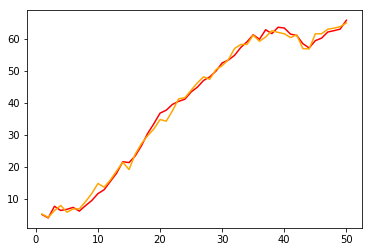

In [115]:
plt.plot(range(1, len(zedd)+1), xs[:, 0], c ='r')
#plt.plot(range(1, len(zedd)+1), zedd, 'o')
plt.plot(range(1, len(zedd)+1), track, c='orange')

In [116]:
(x, P, K, Pp) = kf.rts_smoother(Xs=xs, Ps=cv)

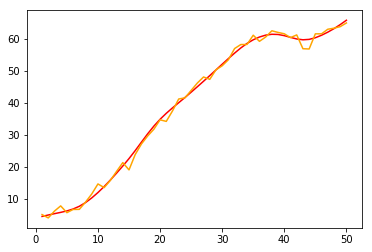

In [117]:
plt.plot(range(1, len(x)+1), x[:, 0], c ='r')
#plt.plot(range(1, len(zedd)+1), zedd, 'o')
plt.plot(range(1, len(P)+1), track, c='orange')

In [157]:
from filterpy.stats import plot_covariance_ellipse

In [165]:
x[0]

array([4.59786949, 0.44824382])

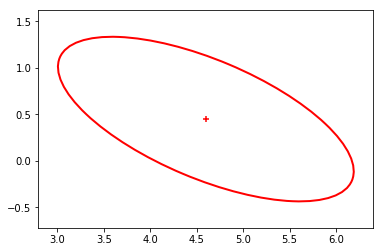

In [167]:
plot_covariance_ellipse(x[0],P[0],edgecolor='r')

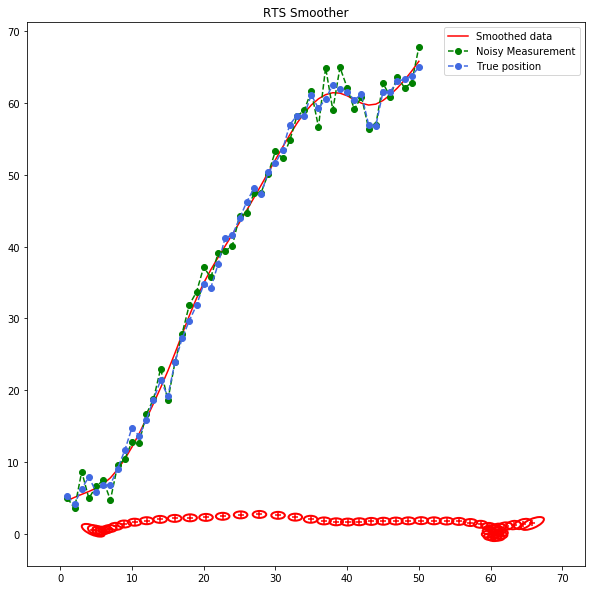

In [176]:
from filterpy.stats import plot_covariance_ellipse
%matplotlib inline
plt.figure(figsize=((10,10)))
plt.plot(range(1, len(x)+1),x[:, 0], c='r', label='Smoothed data')
plt.plot(range(1, len(zedd)+1),zedd, '--o', c= 'g', label='Noisy Measurement')
plt.plot(range(1, len(track)+1),track, '--o', c ='royalblue',label='True position')
#plt.plot(range(1, len(x)+1), cv, c='r', label='Smoothed data')

for i in range(len(P)):
    plot_covariance_ellipse(x[i],P[i],edgecolor='r')
    

plt.legend()
plt.title('RTS Smoother')
plt.show()